In [2]:
import keras.backend as k
import os
from Modelos import Gerador

2024-10-22 16:56:01.033563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 16:56:01.211652: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 16:56:01.264420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 16:56:01.636038: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-22 16:56:02.750674: W tensorflow/compiler/tf2

Criação dos Modelos

In [2]:

for i in range(10):
    k.clear_session()

    Modelo = Gerador(input_shape=(64, 64, 3))
    Modelo.setNome(f'Modelo {i}')
    modelo = Modelo.construir_modelo(salvar=True)

    modelo.summary()

    del Modelo, modelo

"\nk.clear_session()\n\nModelo = Gerador(input_shape=(64, 64, 3))\nModelo.setNome(f'Modelo 9')\nmodelo = Modelo.construir_modelo(salvar=True)\n\nmodelo.summary()\n\ndel Modelo, modelo\n"

Treino, validação e teste - PKLot

In [3]:
from Preprocessamento import preprocessamento_dataframe

treino, treino_df = preprocessamento_dataframe(caminho_csv='PKLot_SegmentadoTreino.csv', autoencoder=True)
validacao, validacao_df = preprocessamento_dataframe(caminho_csv='PKLot_SegmentadoValidacao.csv', autoencoder=True)
teste, teste_df = preprocessamento_dataframe(caminho_csv='PKLot_SegmentadoTeste.csv', autoencoder=True, data_algumentantation=False)

Found 1000 validated image filenames.


Found 300 validated image filenames.
Found 1000 validated image filenames.


Treinando cada um dos modelos

I0000 00:00:1729620033.978070   89629 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729620034.011896   89629 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729620034.012100   89629 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729620034.013236   89629 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 896)            │        66,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │       898,699 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965,459 (3.68 MB)

 Trainable params: 965,459 (3.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729620038.233670   89700 service.cc:146] XLA service 0x792dfc012270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729620038.233690   89700 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-10-22 15:00:38.302571: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-22 15:00:38.599692: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 

 5/32 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0589

I0000 00:00:1729620043.451059   89700 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0561
Epoch 1: val_loss improved from -inf to 0.03116, saving model to weights_parciais/weights-improvement-01-0.03.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - loss: 0.0555 - val_loss: 0.0312
Epoch 2/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0249
Epoch 2: val_loss did not improve from 0.03116
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0248 - val_loss: 0.0206
Epoch 3/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0185
Epoch 3: val_loss did not improve from 0.03116
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0184 - val_loss: 0.0178
Epoch 4/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0151
Epoch 4: val_loss did not improve from 0.03116
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0151 - val_loss: 0.0142
Epoch 5/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0142
Epoch 5: val_loss did not improve from 0.03116
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - val_loss: 0.0131

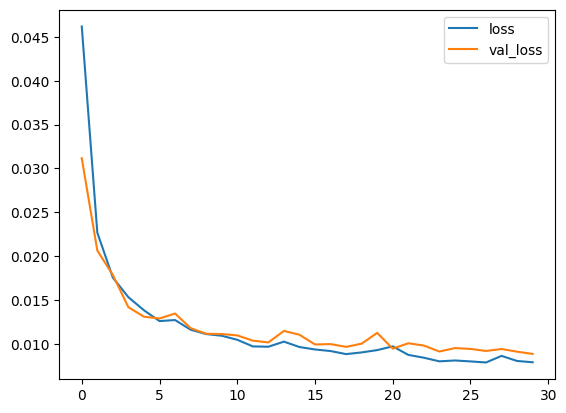

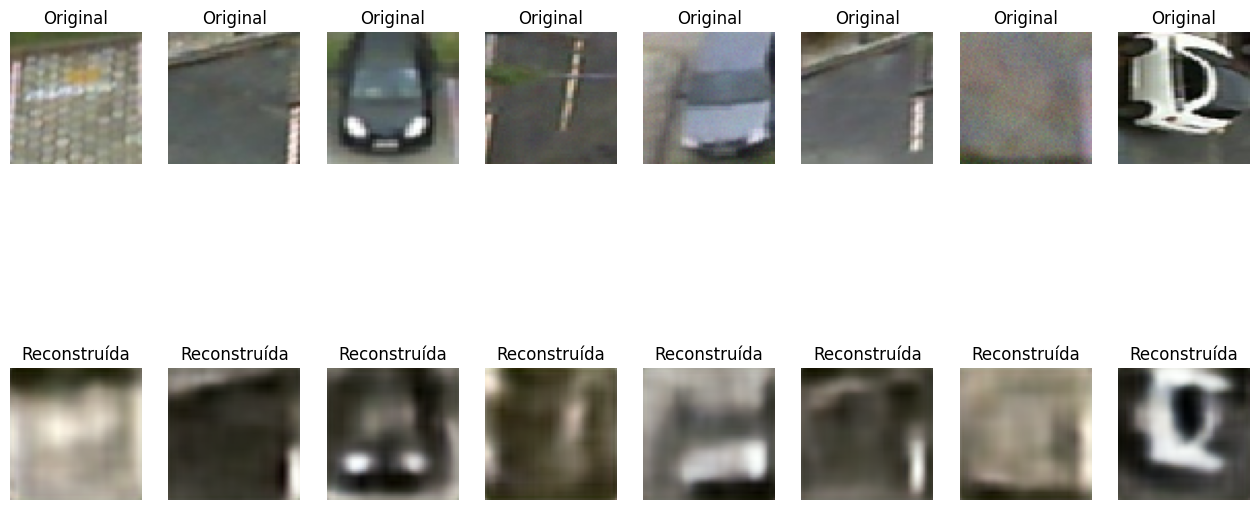

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 9280)           │       178,057 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    86,494,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,673,022 (330.63 MB)

 Trainable params: 86,673,022 (330.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620083.235802   89702 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620083.362344   89702 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0561
Epoch 1: val_loss improved from -inf to 0.03162, saving model to weights_parciais/weights-improvement-01-0.03.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 343ms/step - loss: 0.0558 - val_loss: 0.0316
Epoch 2/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0267
Epoch 2: val_loss did not improve from 0.03162
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0265 - val_loss: 0.0181
Epoch 3/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0166
Epoch 3: val_loss did not improve from 0.03162
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0165 - val_loss: 0.0141
Epoch 4/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0127
Epoch 4: val_loss did not improve from 0.03162
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0127 - val_loss: 0.0111
Epoch 5/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0101
Epoch 5: val_loss did not improve from 0.03162
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0100 - val_loss: 0.0094

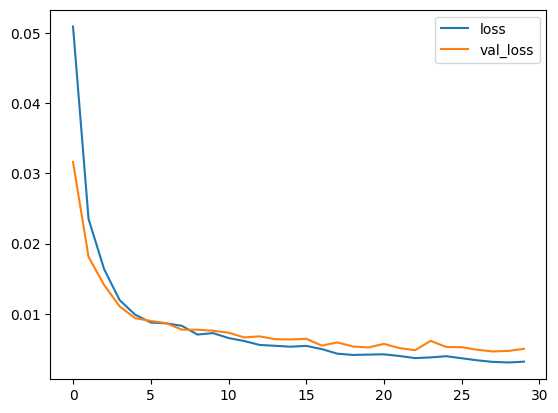

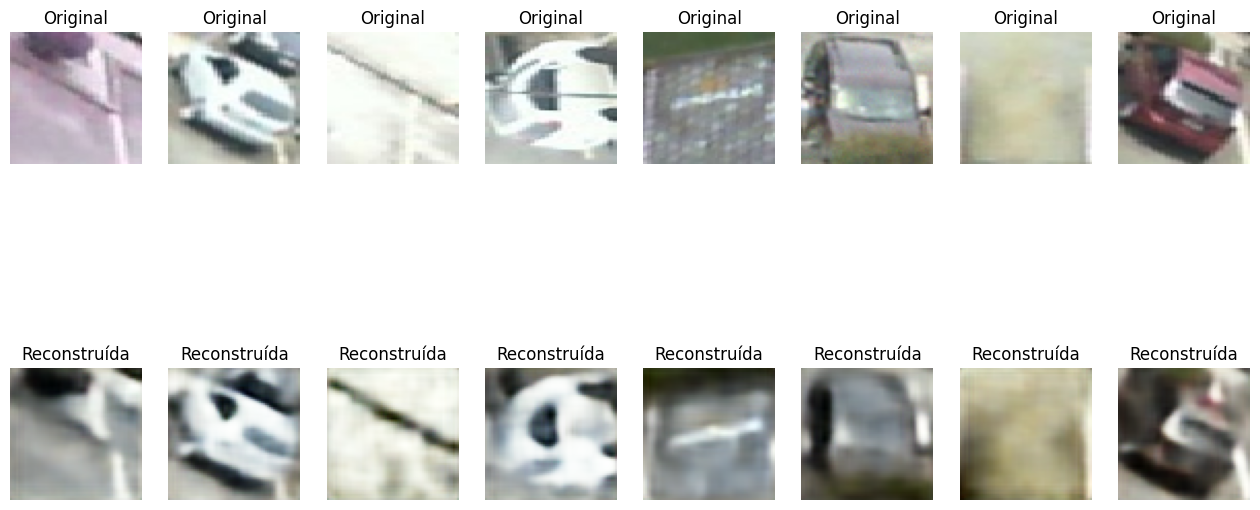

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 21)             │       380,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │       384,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 765,182 (2.92 MB)

 Trainable params: 765,182 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620166.813787   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620166.954969   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620167.102300   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 0.0560
Epoch 1: val_loss improved from -inf to 0.03939, saving model to weights_parciais/weights-improvement-01-0.04.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 354ms/step - loss: 0.0558 - val_loss: 0.0394
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0349
Epoch 2: val_loss did not improve from 0.03939
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0348 - val_loss: 0.0303
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0266
Epoch 3: val_loss did not improve from 0.03939
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0265 - val_loss: 0.0247
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0240
Epoch 4: val_loss did not improve from 0.03939
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0240 - val_loss: 0.0234
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0231
Epoch 5: val_loss did not improve from 0.03939
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0231 - val_loss: 0.0210

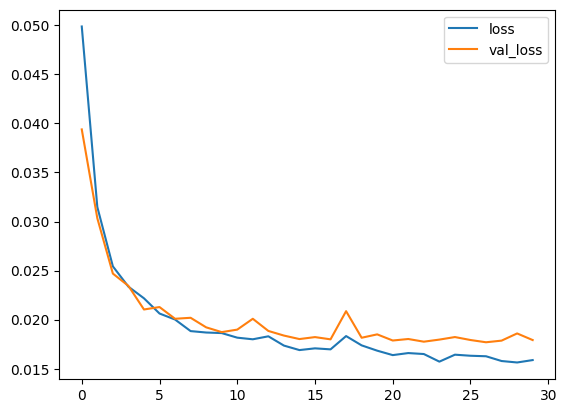

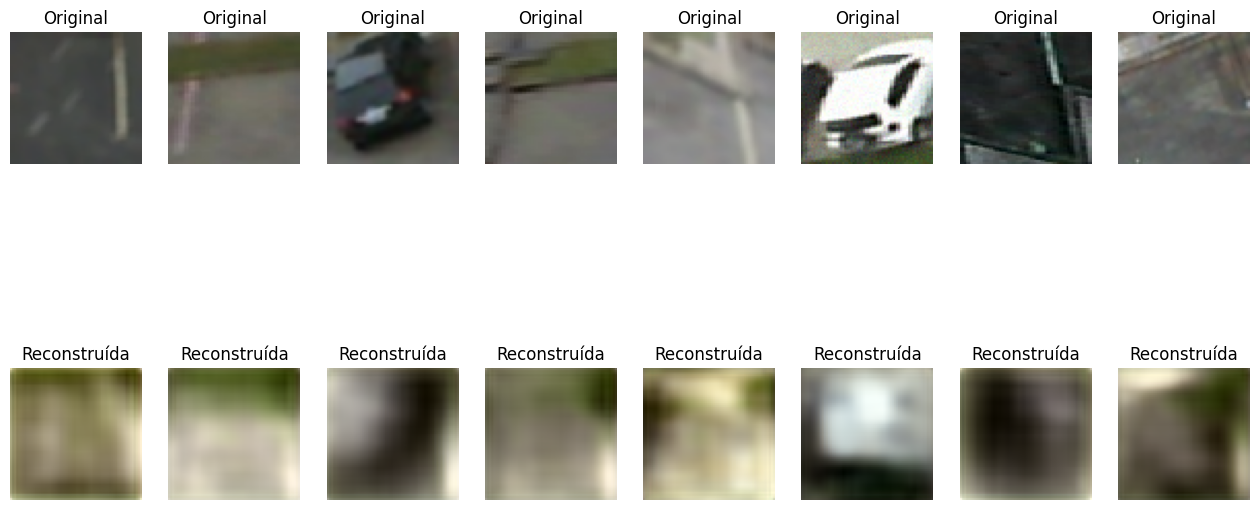

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 129)            │       575,611 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │       742,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,764 (5.03 MB)

 Trainable params: 1,317,764 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620247.607594   89699 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620247.740319   89699 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.0570
Epoch 1: val_loss improved from -inf to 0.05332, saving model to weights_parciais/weights-improvement-01-0.05.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 0.0569 - val_loss: 0.0533
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0485
Epoch 2: val_loss did not improve from 0.05332
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0483 - val_loss: 0.0307
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0273
Epoch 3: val_loss did not improve from 0.05332
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0273 - val_loss: 0.0245
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0230
Epoch 4: val_loss did not improve from 0.05332
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0230 - val_loss: 0.0234
Epoch 5/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0212
Epoch 5: val_loss did not improve from 0.05332
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0212 - val_loss: 0.0227

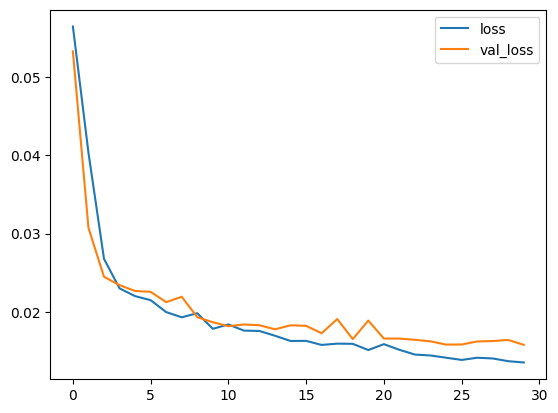

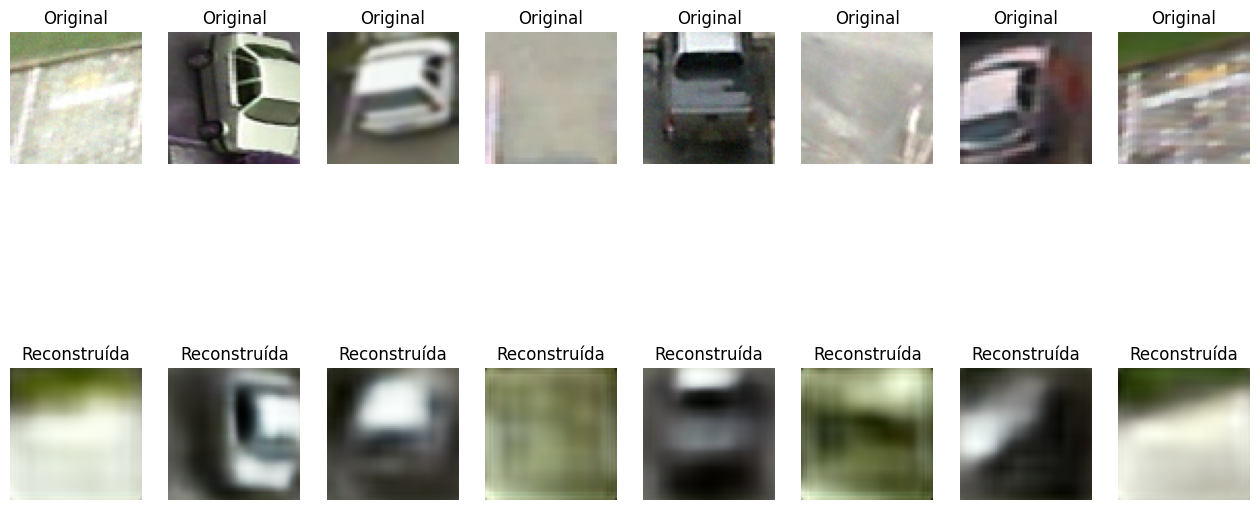

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 3184)           │       301,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    10,798,588 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,099,724 (42.34 MB)

 Trainable params: 11,099,724 (42.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620307.504953   89701 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620307.634827   89701 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0535
Epoch 1: val_loss improved from -inf to 0.02967, saving model to weights_parciais/weights-improvement-01-0.03.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - loss: 0.0531 - val_loss: 0.0297
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0261
Epoch 2: val_loss did not improve from 0.02967
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0260 - val_loss: 0.0213
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0196
Epoch 3: val_loss did not improve from 0.02967
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0196 - val_loss: 0.0173
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0163
Epoch 4: val_loss did not improve from 0.02967
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0163 - val_loss: 0.0148
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144
Epoch 5: val_loss did not improve from 0.02967
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0144 - val_loss: 0.0137

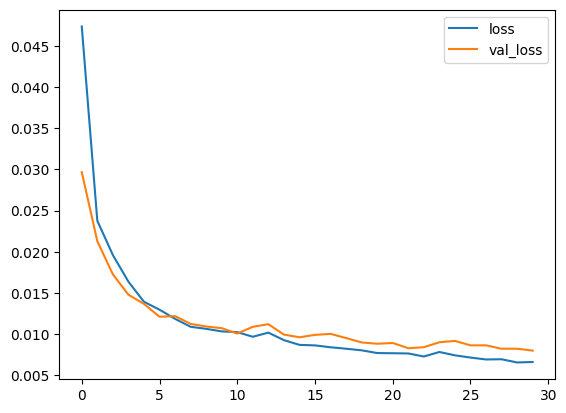

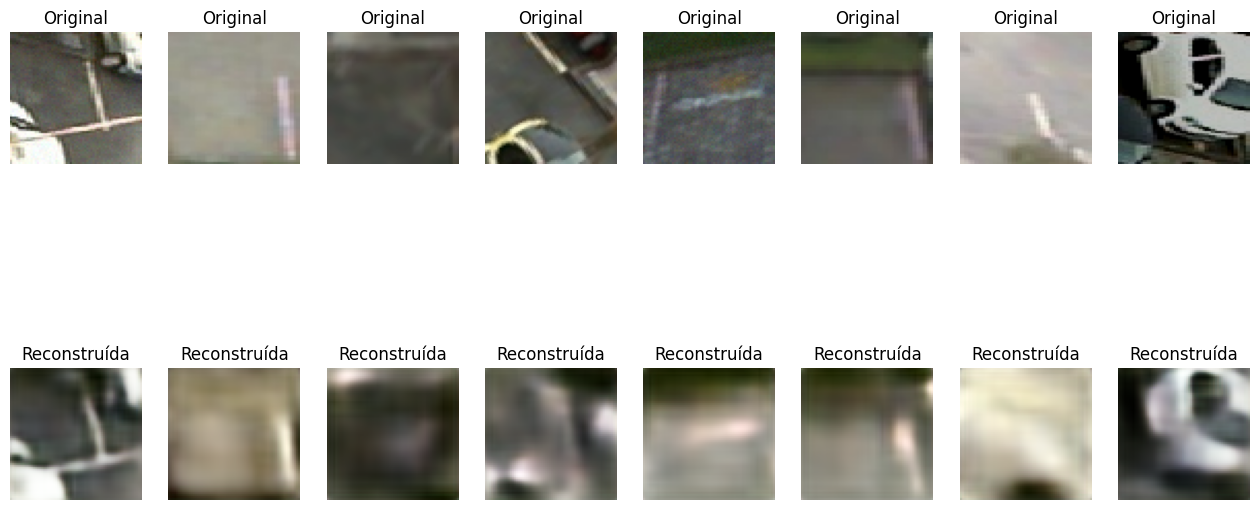

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 972)            │       980,444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │     2,457,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,438,088 (13.12 MB)

 Trainable params: 3,438,088 (13.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620367.217825   89701 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620367.353608   89701 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.0590
Epoch 1: val_loss improved from -inf to 0.05665, saving model to weights_parciais/weights-improvement-01-0.06.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 267ms/step - loss: 0.0588 - val_loss: 0.0567
Epoch 2/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0580
Epoch 2: val_loss did not improve from 0.05665
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0579 - val_loss: 0.0566
Epoch 3/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0592
Epoch 3: val_loss did not improve from 0.05665
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0591 - val_loss: 0.0528
Epoch 4/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0541
Epoch 4: val_loss did not improve from 0.05665
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0541 - val_loss: 0.0503
Epoch 5/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0469
Epoch 5: val_loss did not improve from 0.05665
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0465 - val_loss: 0.0319

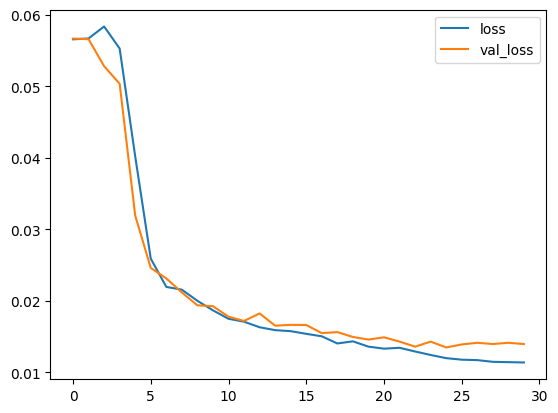

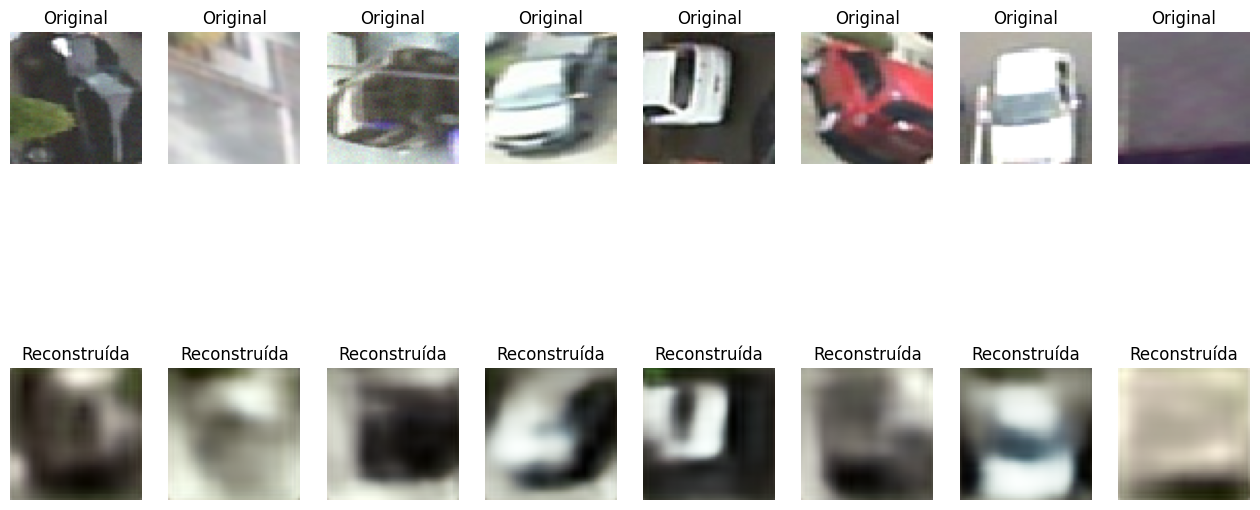

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 166)            │       734,714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │     1,010,443 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,745,157 (6.66 MB)

 Trainable params: 1,745,157 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620435.216706   89702 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620435.357463   89702 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.0563
Epoch 1: val_loss improved from -inf to 0.05621, saving model to weights_parciais/weights-improvement-01-0.06.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - loss: 0.0564 - val_loss: 0.0562
Epoch 2/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0570
Epoch 2: val_loss did not improve from 0.05621
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0570 - val_loss: 0.0557
Epoch 3/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0563
Epoch 3: val_loss did not improve from 0.05621
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0562 - val_loss: 0.0464
Epoch 4/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0461
Epoch 4: val_loss did not improve from 0.05621
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0457 - val_loss: 0.0312
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0296
Epoch 5: val_loss did not improve from 0.05621
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0296 - val_loss: 0.0295

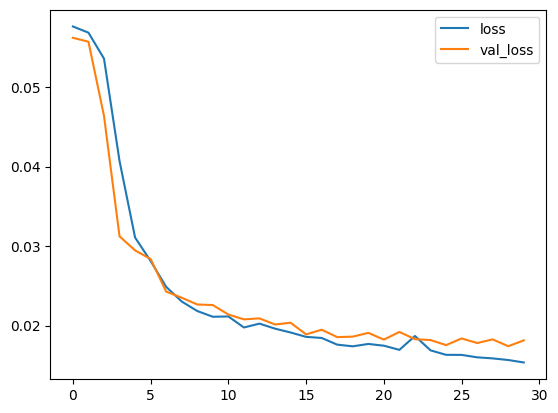

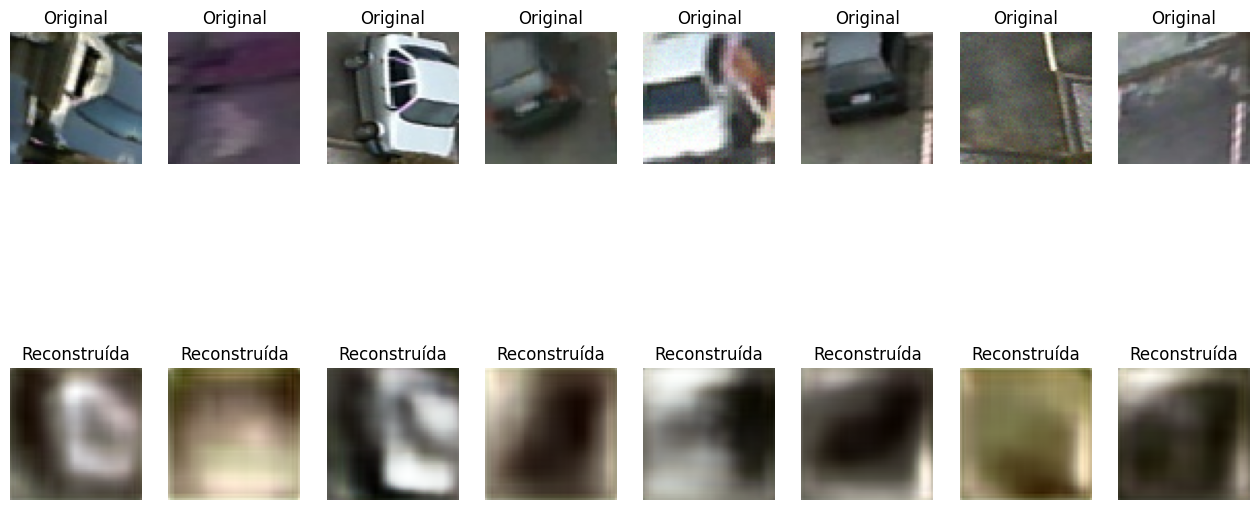

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4032)           │       789,786 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    17,622,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,412,167 (70.24 MB)

 Trainable params: 18,412,167 (70.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620499.166672   89701 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620499.300317   89701 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.0607
Epoch 1: val_loss improved from -inf to 0.04987, saving model to weights_parciais/weights-improvement-01-0.05.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - loss: 0.0605 - val_loss: 0.0499
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0401
Epoch 2: val_loss did not improve from 0.04987
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0399 - val_loss: 0.0287
Epoch 3/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0257
Epoch 3: val_loss did not improve from 0.04987
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0256 - val_loss: 0.0223
Epoch 4/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0194
Epoch 4: val_loss did not improve from 0.04987
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0193 - val_loss: 0.0166
Epoch 5/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0163
Epoch 5: val_loss did not improve from 0.04987
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0163 - val_loss: 0.0151

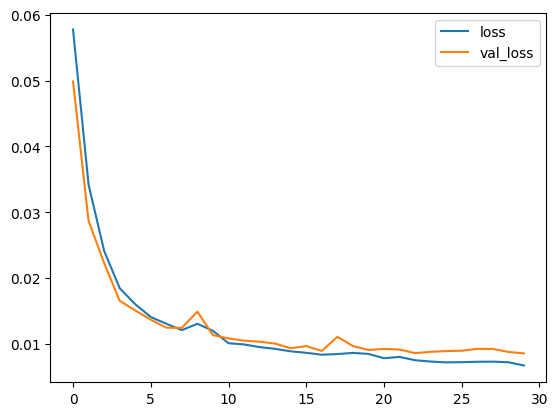

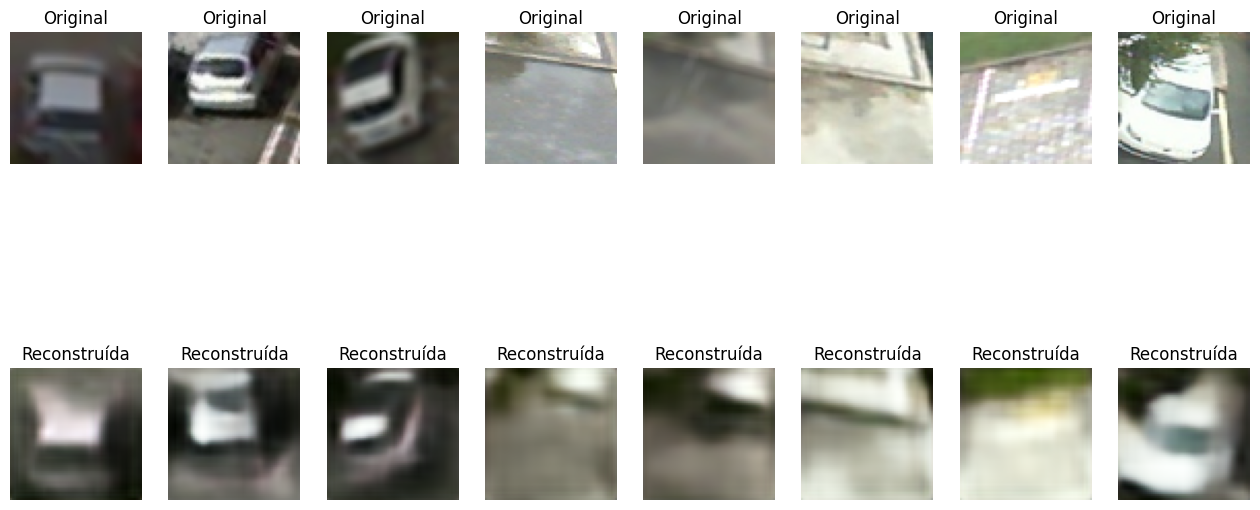

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 3168)           │     1,007,402 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    11,399,633 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,407,035 (47.33 MB)

 Trainable params: 12,407,035 (47.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620572.346698   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620572.481332   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0573
Epoch 1: val_loss improved from -inf to 0.04775, saving model to weights_parciais/weights-improvement-01-0.05.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - loss: 0.0573 - val_loss: 0.0478
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0408
Epoch 2: val_loss did not improve from 0.04775
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0407 - val_loss: 0.0287
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0239
Epoch 3: val_loss did not improve from 0.04775
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0238 - val_loss: 0.0199
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0184
Epoch 4: val_loss did not improve from 0.04775
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0184 - val_loss: 0.0170
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0159
Epoch 5: val_loss did not improve from 0.04775
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0159 - val_loss: 0.0162

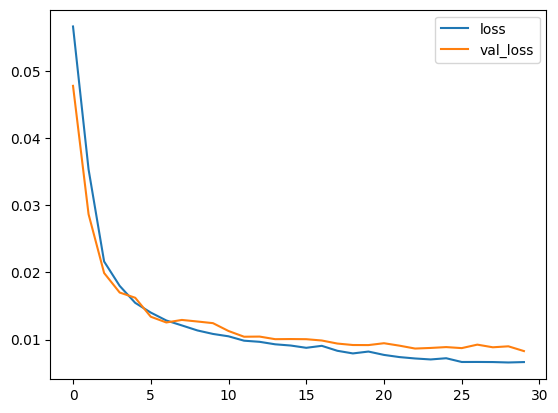

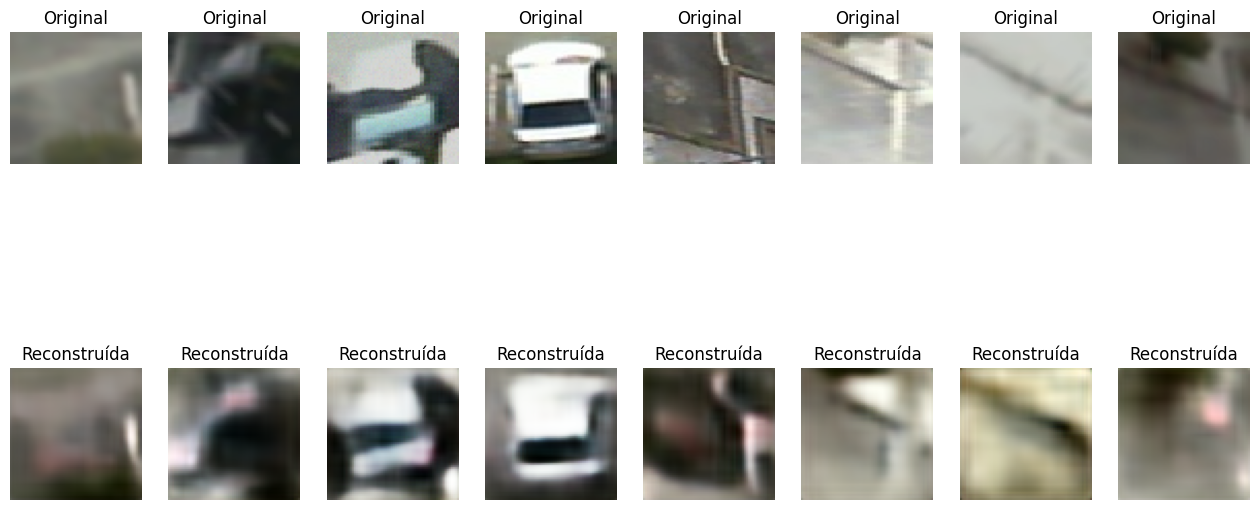

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 93)             │       960,397 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │     1,046,983 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,007,380 (7.66 MB)

 Trainable params: 2,007,380 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


E0000 00:00:1729620651.839421   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620651.961608   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1729620652.084337   89697 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.0574
Epoch 1: val_loss improved from -inf to 0.05283, saving model to weights_parciais/weights-improvement-01-0.05.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - loss: 0.0574 - val_loss: 0.0528
Epoch 2/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0551
Epoch 2: val_loss improved from 0.05283 to 0.05640, saving model to weights_parciais/weights-improvement-02-0.06.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0552 - val_loss: 0.0564
Epoch 3/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0590
Epoch 3: val_loss improved from 0.05640 to 0.05803, saving model to weights_parciais/weights-improvement-03-0.06.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0590 - val_loss: 0.0580
Epoch 4/30
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0606
Epoch 4: val_loss did not improve from 0.05803
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0604 - val_loss: 0.0552
Epoch 5/30
31/32 ━━━━━━━━━━━━━━━

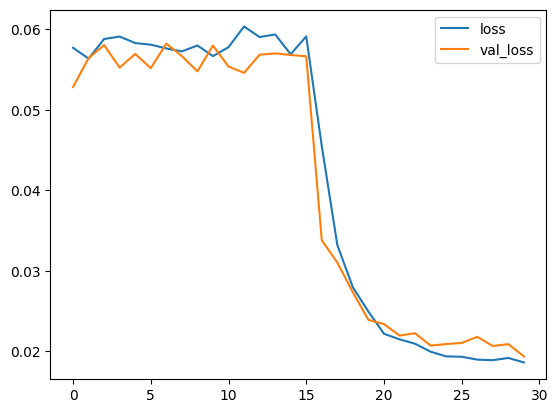

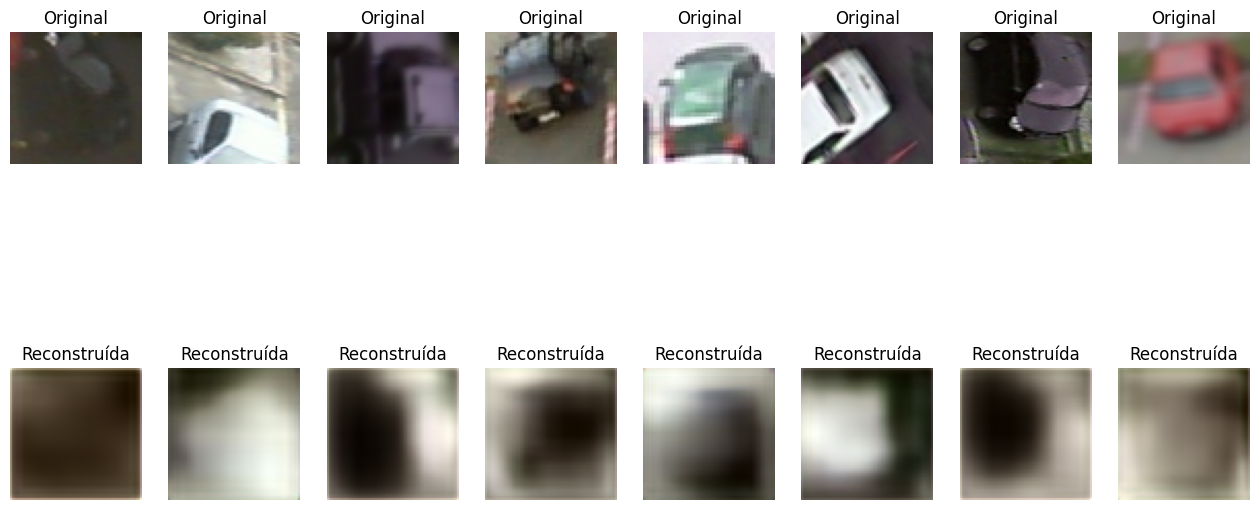

In [4]:
for i in range(10):
    print(f"Treinando o modelo {i}: ")

    Modelo = Gerador()

    AutoencoderModelo0 = Modelo.carrega_modelo(f'Modelos_keras/Autoencoders_Gerados/Modelo {i}.keras')

    Modelo.Dataset(treino, validacao, teste)

    Modelo.compilar_modelo()

    

    Modelo.treinar_autoencoder(epocas=30, salvar=True, batch_size=8)

    del Modelo

In [3]:
for i in range(10):
    print(f"Treinando o modelo {i}: ")

    Modelo = Gerador()

    AutoencoderModelo0 = Modelo.carrega_modelo(f'Modelos_keras/Autoencoders_Gerados/Modelo {i}.keras')
    encoder = Modelo.encoder
    decoder = Modelo.decoder 

    encoder.summary()
    decoder.summary()

    del Modelo


Treinando o modelo 0: 


I0000 00:00:1729626968.255722  113398 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729626968.353534  113398 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729626968.353863  113398 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729626968.355153  113398 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 896)            │        66,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │       898,699 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,896,379 (11.05 MB)

 Trainable params: 965,459 (3.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,930,920 (7.37 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 125)    │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 21)     │        23,646 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 21)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 57)     │        10,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 57)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 56)       │        28,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,760 (260.78 KB)

 Trainable params: 66,760 (260.78 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 896)            │       803,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 56)       │        28,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 57)       │        28,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 57)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 21)     │        10,794 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 21)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 125)    │        23,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 125)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 3)      │         3,378 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 898,699 (3.43 MB)

 Trainable params: 898,699 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 1: 


2024-10-22 16:56:12.909788: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 344473600 exceeds 10% of free system memory.
2024-10-22 16:56:13.293165: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 344473600 exceeds 10% of free system memory.
2024-10-22 16:56:13.655396: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 344473600 exceeds 10% of free system memory.


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 9280)           │       178,057 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    86,494,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,019,068 (991.89 MB)

 Trainable params: 86,673,022 (330.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 173,346,046 (661.26 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 87)     │         2,436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 87)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 84)     │        65,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 84)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 145)    │       109,765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 145)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9280)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,057 (695.54 KB)

 Trainable params: 178,057 (695.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 9280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9280)           │    86,127,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 145)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 145)      │       189,370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 145)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 84)     │       109,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 84)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 87)     │        65,859 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 87)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 3)      │         2,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,494,965 (329.95 MB)

 Trainable params: 86,494,965 (329.95 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 2: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 21)             │       380,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │       384,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,295,548 (8.76 MB)

 Trainable params: 765,182 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,530,366 (5.84 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 236)    │         6,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 236)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 132)    │       280,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 132)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 29)     │        34,481 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 29)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 54)       │        14,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 54)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 66)       │        32,142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 66)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 21)       │        12,495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 21)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 380,374 (1.45 MB)

 Trainable params: 380,374 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 21)             │           462 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1, 21)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 21)       │         3,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 2, 2, 21)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 66)       │        12,540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 4, 4, 66)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 54)       │        32,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 8, 8, 54)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 29)       │        14,123 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 16, 16, 29)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 132)    │        34,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 32, 32, 132)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 236)    │       280,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 64, 64, 236)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 3)      │         6,375 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 384,808 (1.47 MB)

 Trainable params: 384,808 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 3: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 129)            │       575,611 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │       742,153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,953,294 (15.08 MB)

 Trainable params: 1,317,764 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,635,530 (10.05 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 153)    │         4,284 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 153)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 87)     │       119,886 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 87)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 70)     │        54,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 70)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 227)      │       143,237 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 227)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 79)       │       161,476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 79)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 129)      │        91,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 129)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 129)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,611 (2.20 MB)

 Trainable params: 575,611 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 129)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 129)            │        16,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1, 129)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 129)      │       149,898 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 2, 2, 129)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 79)       │        91,798 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 4, 4, 79)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 227)      │       161,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 8, 8, 227)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 70)       │       143,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 16, 16, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 87)     │        54,897 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 32, 32, 87)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 153)    │       119,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 64, 64, 153)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 3)      │         4,134 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 742,153 (2.83 MB)

 Trainable params: 742,153 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 4: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 3184)           │       301,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    10,798,588 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,299,174 (127.03 MB)

 Trainable params: 11,099,724 (42.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,199,450 (84.68 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 122)    │         3,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 122)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 123)    │       135,177 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 123)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 56)     │        62,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 199)      │       100,495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 199)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3184)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,136 (1.15 MB)

 Trainable params: 301,136 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3184)           │    10,141,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 199)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 199)      │       356,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 199)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 56)       │       100,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 56)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 123)    │        62,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 123)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 122)    │       135,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 122)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 3)      │         3,297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,798,588 (41.19 MB)

 Trainable params: 10,798,588 (41.19 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 5: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 972)            │       980,444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │     2,457,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,314,266 (39.35 MB)

 Trainable params: 3,438,088 (13.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,876,178 (26.23 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 214)    │         5,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 214)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 42)     │        80,934 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 42)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 145)    │        54,955 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 145)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 240)      │       313,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 240)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 243)      │       525,123 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 243)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 972)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 980,444 (3.74 MB)

 Trainable params: 980,444 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 972)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 972)            │       945,756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 2, 2, 243)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 243)      │       531,684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 4, 4, 243)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 240)      │       525,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 8, 8, 240)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 145)      │       313,345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 145)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 42)     │        54,852 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 42)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 214)    │        81,106 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 64, 64, 214)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 3)      │         5,781 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,457,644 (9.38 MB)

 Trainable params: 2,457,644 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 6: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 166)            │       734,714 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │     1,010,443 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,235,473 (19.97 MB)

 Trainable params: 1,745,157 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,490,316 (13.31 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 225)    │         6,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 225)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 27)     │        54,702 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 27)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 26)     │         6,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 26)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 158)      │        37,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 158)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 216)      │       307,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 216)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 166)      │       322,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 166)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 166)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,714 (2.80 MB)

 Trainable params: 734,714 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 166)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 166)            │        27,722 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1, 166)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 166)      │       248,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 2, 2, 166)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 216)      │       322,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 4, 4, 216)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 158)      │       307,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 8, 8, 158)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 26)       │        36,998 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 16, 16, 26)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 27)     │         6,345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 32, 32, 27)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 225)    │        54,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 64, 64, 225)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 3)      │         6,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,443 (3.85 MB)

 Trainable params: 1,010,443 (3.85 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 7: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 4032)           │       789,786 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    17,622,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,236,503 (210.71 MB)

 Trainable params: 18,412,167 (70.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,824,336 (140.47 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 165)    │         4,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 165)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 79)     │       117,394 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 79)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 224)    │       159,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 224)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 252)      │       508,284 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 252)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4032)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,786 (3.01 MB)

 Trainable params: 789,786 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4032)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4032)           │    16,261,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 252)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 252)      │       571,788 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 252)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 224)      │       508,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 224)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 79)     │       159,343 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 79)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 165)    │       117,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 165)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 3)      │         4,458 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,622,381 (67.22 MB)

 Trainable params: 17,622,381 (67.22 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 8: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 3168)           │     1,007,402 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    11,399,633 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,221,107 (141.99 MB)

 Trainable params: 12,407,035 (47.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,814,072 (94.66 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 151)    │         4,228 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 151)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 169)    │       229,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 169)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 234)    │       356,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 234)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 198)      │       417,186 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 198)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3168)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,007,402 (3.84 MB)

 Trainable params: 1,007,402 (3.84 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3168)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3168)           │    10,039,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 198)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 198)      │       353,034 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 198)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 234)      │       417,222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 234)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 169)    │       356,083 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 169)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 151)    │       229,822 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 151)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 3)      │         4,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,399,633 (43.49 MB)

 Trainable params: 11,399,633 (43.49 MB)

 Non-trainable params: 0 (0.00 B)

Treinando o modelo 9: 


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 93)             │       960,397 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │     1,046,983 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,022,142 (22.97 MB)

 Trainable params: 2,007,380 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,014,762 (15.32 MB)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 36)     │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 176)    │        57,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 176)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 203)    │       321,755 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 203)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 131)      │       239,468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 131)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 169)      │       199,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 169)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 93)       │       141,546 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 93)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 960,397 (3.66 MB)

 Trainable params: 960,397 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 93)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 93)             │         8,742 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1, 93)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 93)       │        77,934 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 2, 2, 93)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 169)      │       141,622 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 4, 4, 169)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 131)      │       199,382 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 8, 8, 131)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 203)      │       239,540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 16, 16, 203)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 176)    │       321,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 32, 32, 176)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 36)     │        57,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 64, 64, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 3)      │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,046,983 (3.99 MB)

 Trainable params: 1,046,983 (3.99 MB)

 Non-trainable params: 0 (0.00 B)

Treino, validação, teste - CNR